In [152]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [153]:
real_state_house_price_dataframe = pd.read_csv("house_price_bd.csv")

In [154]:
print(real_state_house_price_dataframe)

                                                  Title  Bedrooms  Bathrooms  \
0     We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1     Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2     1370 square feet apartment is ready to sale in...       3.0        3.0   
3     2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4     Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   
...                                                 ...       ...        ...   
3860  Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...       3.0        3.0   
3861  Properly Designed This 1000 Square Feet Apartm...       2.0        2.0   
3862  1240 Sq Ft Flat For Sale Is Awaiting You In Ga...       3.0        3.0   
3863  An Apartment Of 1300 Sq Ft Is Up For Sale In J...       3.0        3.0   
3864  1350 Sq Ft Residential Apartment For Sale In G...       3.0        3.0   

     Floor_no Occupancy_status  Floor_a

In [155]:
print(real_state_house_price_dataframe.head())

                                               Title  Bedrooms  Bathrooms  \
0  We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1  Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2  1370 square feet apartment is ready to sale in...       3.0        3.0   
3  2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4  Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   

  Floor_no Occupancy_status  Floor_area   City Price_in_taka  \
0        3           vacant      1960.0  dhaka   ৳39,000,000   
1        1           vacant      1705.0  dhaka   ৳16,900,000   
2        6           vacant      1370.0  dhaka   ৳12,500,000   
3        4           vacant      2125.0  dhaka   ৳20,000,000   
4        4           vacant      2687.0  dhaka   ৳47,500,000   

                      Location  
0           Gulshan 1, Gulshan  
1  Lake Circus Road, Kalabagan  
2         Shukrabad, Dhanmondi  
3     Block L, Bashu

In [156]:
real_state_house_price_dataframe.shape

(3865, 9)

In [157]:
real_state_house_price_dataframe.isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [158]:
real_state_house_price_dataframe.describe

<bound method NDFrame.describe of                                                   Title  Bedrooms  Bathrooms  \
0     We Are Offering You A Very Spacious 1960 Sq Ft...       3.0        4.0   
1     Valuable 1705 Square Feet Apartment Is Ready T...       3.0        3.0   
2     1370 square feet apartment is ready to sale in...       3.0        3.0   
3     2125 Square Feet Apartment For Sale In Bashund...       3.0        3.0   
4     Buy This 2687 Square Feet Flat In The Nice Are...       3.0        3.0   
...                                                 ...       ...        ...   
3860  Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...       3.0        3.0   
3861  Properly Designed This 1000 Square Feet Apartm...       2.0        2.0   
3862  1240 Sq Ft Flat For Sale Is Awaiting You In Ga...       3.0        3.0   
3863  An Apartment Of 1300 Sq Ft Is Up For Sale In J...       3.0        3.0   
3864  1350 Sq Ft Residential Apartment For Sale In G...       3.0        3.0   

     

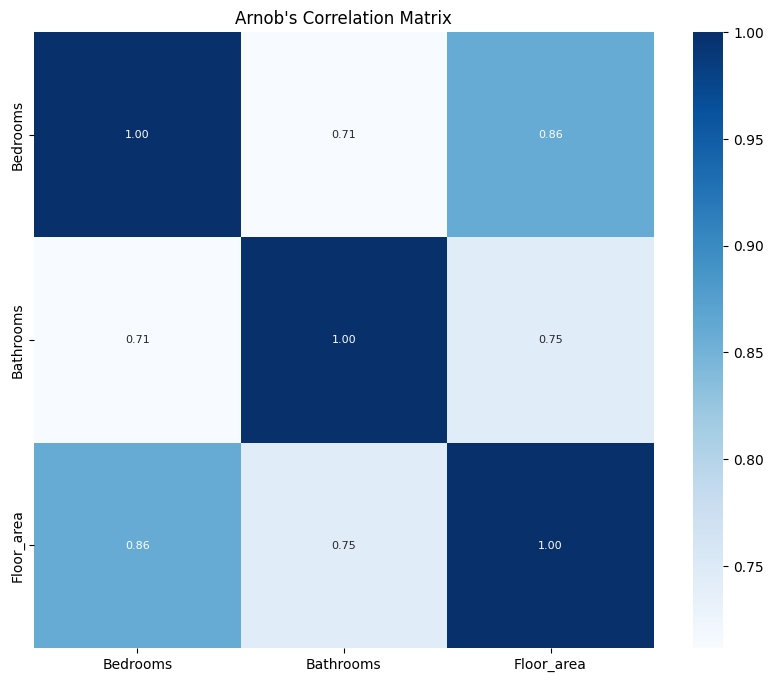

In [159]:
# Select only numeric columns
numeric_df = real_state_house_price_dataframe.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Blues',annot=True, annot_kws={'size':8}, fmt='.2f')
plt.title("Arnob's Correlation Matrix")
plt.show()

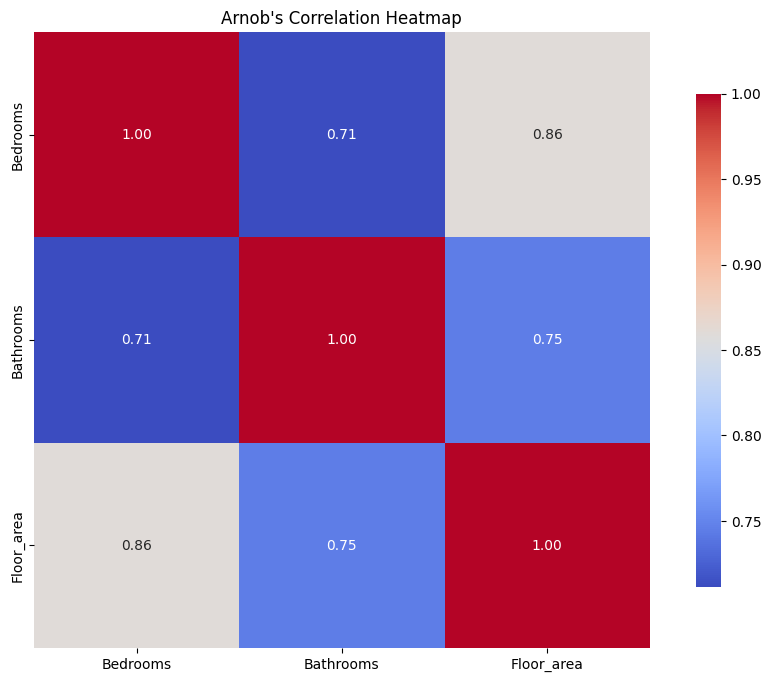

In [161]:
# Remove currency symbol and convert 'Price_in_taka' to numeric
real_state_house_price_dataframe['Price_in_taka'] = real_state_house_price_dataframe['Price_in_taka'].replace({'৳': '', ',': ''}, regex=True).astype(float)

# Handle missing values
real_state_house_price_dataframe = real_state_house_price_dataframe.dropna(subset=['Bedrooms', 'Bathrooms', 'Floor_area', 'Price_in_taka'])

# Display the data types
real_state_house_price_dataframe.dtypes

Title                object
Bedrooms            float64
Bathrooms           float64
Floor_no             object
Occupancy_status     object
Floor_area          float64
City                 object
Price_in_taka       float64
Location             object
dtype: object

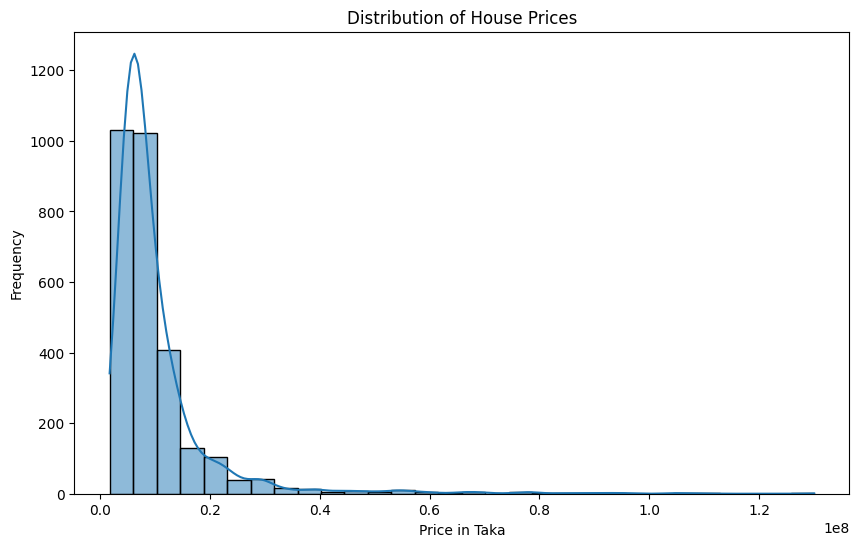

In [162]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(real_state_house_price_dataframe['Price_in_taka'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price in Taka')
plt.ylabel('Frequency')
plt.show()

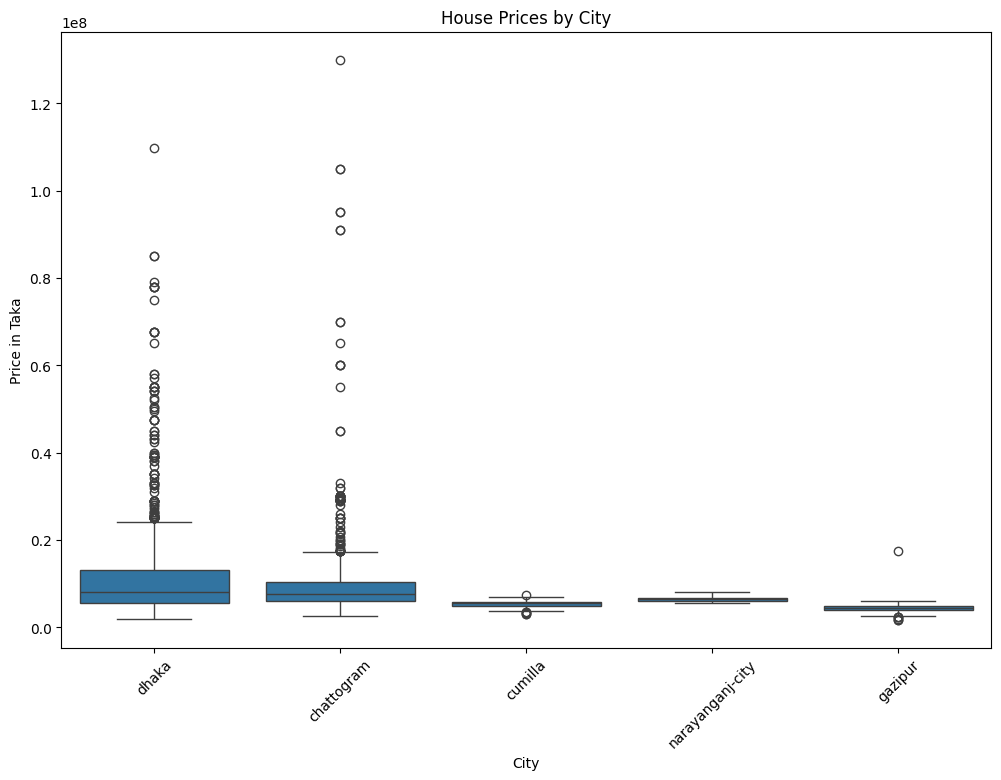

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Price_in_taka', data=real_state_house_price_dataframe)
plt.title('House Prices by City')
plt.xlabel('City')
plt.ylabel('Price in Taka')
plt.xticks(rotation=45)
plt.show()

In [164]:
# Initialize LabelEncoder
label_encoder_city = LabelEncoder()
label_encoder_location = LabelEncoder()

# Apply LabelEncoder to City and Location columns for the entire dataset
real_state_house_price_dataframe['City'] = label_encoder_city.fit_transform(real_state_house_price_dataframe['City'])
real_state_house_price_dataframe['Location'] = label_encoder_location.fit_transform(real_state_house_price_dataframe['Location'])
real_state_house_price_dataframe['Floor_no'] = pd.to_numeric(real_state_house_price_dataframe['Floor_no'], errors='coerce')


# Define features (X) and target variable (Y)
X = real_state_house_price_dataframe[['Bedrooms', 'Bathrooms', 'Floor_area','Floor_no', 'City', 'Location']]
Y = real_state_house_price_dataframe['Price_in_taka']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



C:\Users\pc\AppData\Local\Temp\ipykernel_22208\1890580995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state_house_price_dataframe['City'] = label_encoder_city.fit_transform(real_state_house_price_dataframe['City'])
C:\Users\pc\AppData\Local\Temp\ipykernel_22208\1890580995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state_house_price_dataframe['Location'] = label_encoder_location.fit_transform(real_state_house_price_dataframe['Location'])
C:\Users\pc\AppData\Local\Temp\ipykernel_222

In [165]:
print(X)
print(Y)

      Bedrooms  Bathrooms  Floor_area  Floor_no  City  Location
0          3.0        4.0      1960.0       3.0     2       170
1          3.0        3.0      1705.0       1.0     2       214
2          3.0        3.0      1370.0       6.0     2       373
3          3.0        3.0      2125.0       4.0     2       101
4          3.0        3.0      2687.0       4.0     2       320
...        ...        ...         ...       ...   ...       ...
3860       3.0        3.0      1350.0       8.0     3       193
3861       2.0        2.0      1000.0       7.0     3       115
3862       3.0        3.0      1240.0       9.0     3       193
3863       3.0        3.0      1300.0       9.0     3       193
3864       3.0        3.0      1350.0       8.0     3       193

[2864 rows x 6 columns]
0       39000000.0
1       16900000.0
2       12500000.0
3       20000000.0
4       47500000.0
           ...    
3860     4500000.0
3861     4300000.0
3862     4960000.0
3863     5200000.0
3864     4500000.

In [166]:
print(X.shape, X_train.shape, X_test.shape)

(2864, 6) (2291, 6) (573, 6)


In [167]:
# Initialize and train the linear regression model
model = XGBRegressor()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)


In [168]:
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [169]:
training_data_prediction = model.predict(X_train)

In [170]:
print(training_data_prediction)

[6000973.5 7009959.5 4434879.5 ... 2634325.5 3539796.  5649985. ]


In [171]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# To predict new data, you need to apply the same transformations to City and Location:
new_data = pd.DataFrame({
    'Bedrooms': [3],
    'Bathrooms': [3],
    'Floor_area': [1705],
     'Floor_no':[1],
    'City': ['dhaka'],  # Lowercase example for City only
    'Location': ['Lake Circus Road, Kalabagan']  # Case-sensitive Location
})

# Normalize the case (convert to lowercase) for City only
new_data['City'] = new_data['City'].str.lower()

# Apply LabelEncoder to the new data (use transform, not fit_transform)
try:
    new_data['City'] = label_encoder_city.transform(new_data['City'])  # Using transform
    new_data['Location'] = label_encoder_location.transform(new_data['Location'])  # Using transform
except ValueError as e:
    # Handle unseen label
    print("Error in label encoding:", e)
    # Here you can decide to assign a default value or handle it differently
    # For example, using `-1` for unseen categories
    new_data['City'] = -1
    new_data['Location'] = -1

# Make prediction on the new data
prediction = model.predict(new_data[['Bedrooms', 'Bathrooms', 'Floor_area', 'Floor_no', 'City', 'Location']])
print(f"Predicted House Price: {prediction[0]:,.2f} BDT")

Mean Squared Error: 7937962700630.497
Predicted House Price: 16,803,104.00 BDT


In [172]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9962801009138172
Mean Absolute Error :  406923.1207442165


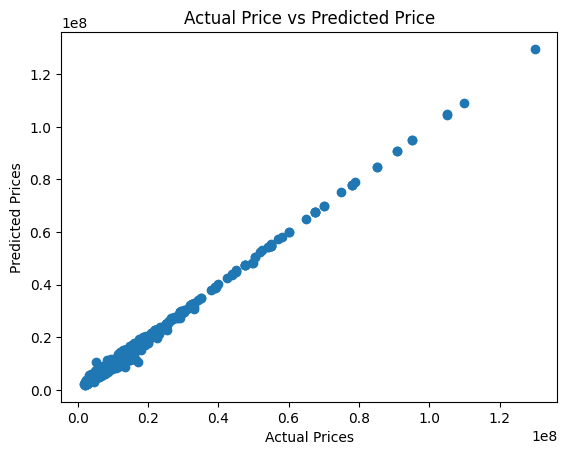

In [173]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [174]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [175]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8948370854327445
Mean Absolute Error :  1169720.8963787085


In [176]:
model.save_model("real_state_house_price_bd_model.json")